In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df_tr_lbl = pd.read_csv('Dataset/data/train.csv')
df_tr_lbl.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,191,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253,190,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573,189,0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977,188,0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498,187,0,0


In [10]:
def explore_col(s, e):
    
    """Plot 4 main graphs for a single feature.
    
        plot1: histogram 
        plot2: boxplot 
        plot3: line plot (time series over cycle)
        plot4: scatter plot vs. regression label ttf
        
    Args:
        s (str): The column name of the feature to be plotted.
        e (int): The number of random engines to be plotted for plot 3. Range from 1 -100, 0:all engines, >100: all engines.

    Returns:
        plots
    
    """
    
    fig = plt.figure(figsize=(18,10))


    sub1 = fig.add_subplot(221) 
    sub1.set_title(s +' histogram') 
    sub1.hist(df_tr_lbl[s])

    sub2 = fig.add_subplot(222)
    sub2.set_title(s +' boxplot')
    sub2.boxplot(df_tr_lbl[s])
    
    #np.random.seed(12345)
    
    if e > 100 or e <= 0:
        select_engines = list(pd.unique(df_tr_lbl.id))
    else:
        select_engines = np.random.choice(range(1,101), e, replace=False)
        
    sub3 = fig.add_subplot(223)
    sub3.set_title('time series: ' + s +' / cycle')
    sub3.set_xlabel('cycle')
    for i in select_engines:
        df = df_tr_lbl[['cycle', s]][df_tr_lbl.id == i]
        sub3.plot(df['cycle'],df[s])
    
    sub4 = fig.add_subplot(224)
    sub4.set_title("scatter: "+ s + " / ttf (regr label)")
    sub4.set_xlabel('ttf')
    sub4.scatter(df_tr_lbl['ttf'],df_tr_lbl[s])


    plt.tight_layout()
    plt.show()

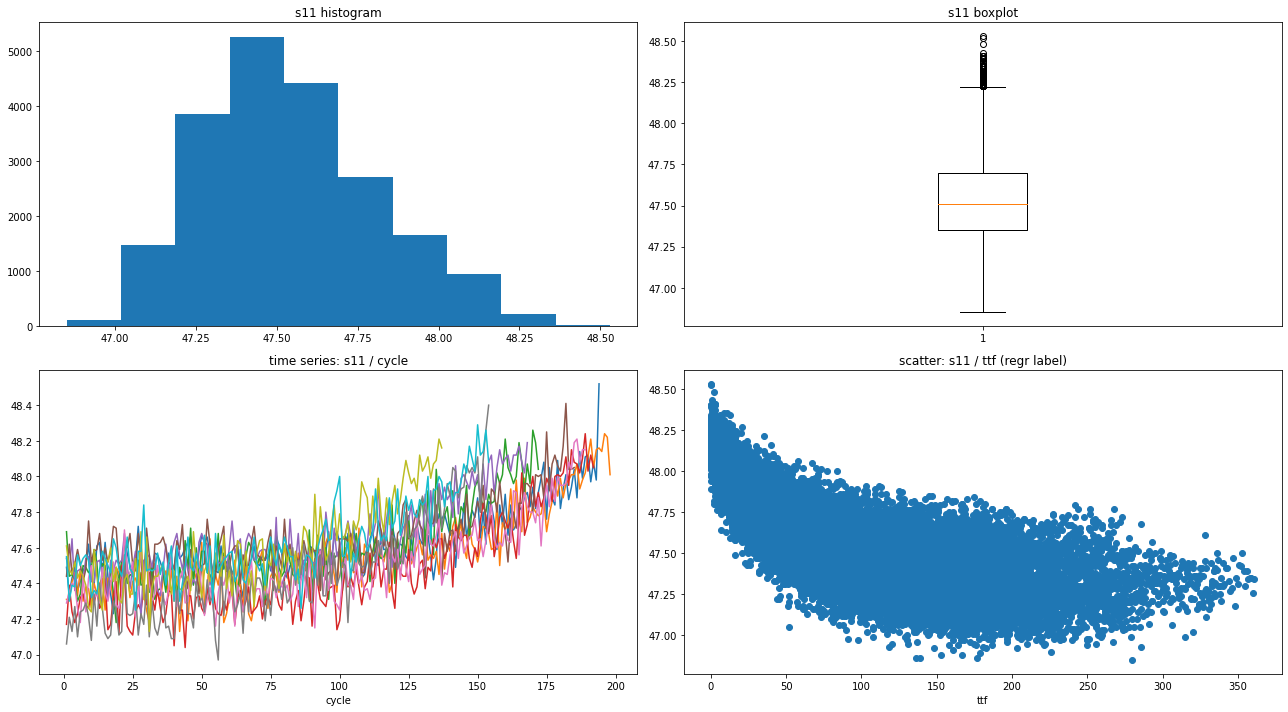

In [13]:
explore_col("s11", 10)


      cycle    s11
8042      1  47.38
8043      2  47.10
8044      3  47.46
8045      4  47.27
8046      5  47.34
...     ...    ...
8233    192  47.94
8234    193  48.07
8235    194  48.13
8236    195  48.11
8237    196  47.97

[196 rows x 2 columns]
       cycle    s11
17152      1  47.31
17153      2  47.30
17154      3  47.36
17155      4  47.48
17156      5  47.38
...      ...    ...
17335    184  48.14
17336    185  48.07
17337    186  48.16
17338    187  48.35
17339    188  48.17

[188 rows x 2 columns]
       cycle    s11
17618      1  47.36
17619      2  47.44
17620      3  47.35
17621      4  47.28
17622      5  47.35
...      ...    ...
17791    174  48.04
17792    175  48.20
17793    176  48.22
17794    177  48.34
17795    178  48.11

[178 rows x 2 columns]
      cycle    s11
7146      1  47.35
7147      2  47.43
7148      3  47.40
7149      4  47.41
7150      5  47.29
...     ...    ...
7311    166  48.18
7312    167  47.99
7313    168  48.13
7314    169  48.14
7315    170

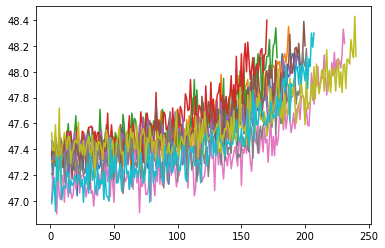

In [23]:
e=10
s="s11"

if e > 100 or e <= 0:
    select_engines = list(pd.unique(df_tr_lbl.id))
else:
    select_engines = np.random.choice(range(1,101), e, replace=False)


for i in select_engines:
    df = df_tr_lbl[['cycle', s]][df_tr_lbl.id == i]
    print(df)
    df.to_csv("./RUL_data/{}.csv".format(i))
    plt.plot(df['cycle'],df[s])